<a href="https://colab.research.google.com/github/quangthangggg/projects_ML/blob/main/flower_regconization/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%cd /content/drive/MyDrive/Colab Notebooks/ML/Flower reg

/content/drive/MyDrive/Colab Notebooks/ML/Flower reg


In [1]:
import os

In [6]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle competitions download https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

403 - Forbidden


In [13]:
! kaggle datasets download https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

Invalid dataset specification https://www.kaggle.com/datasets/alxmamaev/flowers-recognition


In [14]:
! kaggle datasets download -d alxmamaev/flowers-recognition

 95% 214M/225M [00:00<00:00, 256MB/s]
100% 225M/225M [00:01<00:00, 232MB/s]


In [1]:
cd /content/drive/MyDrive/Colab Notebooks/ML/Flower reg/flowers

/content/drive/MyDrive/Colab Notebooks/ML/Flower reg/flowers


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
from sklearn.model_selection import train_test_split

In [11]:
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
import random
import glob
import shutil

In [26]:
TRAIN_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/ML/Flower reg/'
SUB_DIRS = ['train/','test/']
CLASS_DIRS = ['daisy/','dandelion/','rose/','sunflower/','tulip/'] 

In [11]:
for sub in SUB_DIRS:
  for class_dir in CLASS_DIRS:
    os.makedirs(TRAIN_DATA_PATH + sub + class_dir,exist_ok=True)

In [13]:
daisy = glob.glob(TRAIN_DATA_PATH + 'flowers/daisy/*')
dandelion = glob.glob(TRAIN_DATA_PATH + 'flowers/dandelion/*')
rose = glob.glob(TRAIN_DATA_PATH + 'flowers/rose/*')
sunflower = glob.glob(TRAIN_DATA_PATH + 'flowers/sunflower/*')
tulip = glob.glob(TRAIN_DATA_PATH + 'flowers/tulip/*')

In [27]:
kind =[daisy,dandelion,rose,sunflower,tulip]
for index,flower_kind in enumerate(kind):
  random.shuffle(flower_kind)
  train=flower_kind[:int(len(flower_kind)*0.7)]
  test=flower_kind[int(len(flower_kind)*0.7):]
  for path in train: shutil.move(path,TRAIN_DATA_PATH + SUB_DIRS[0]+ CLASS_DIRS[index])
  for path in test: shutil.move(path,TRAIN_DATA_PATH + SUB_DIRS[1]+ CLASS_DIRS[index])

Error: ignored

In [13]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/ML/Flower reg/train/', 
                                             class_mode='categorical', batch_size=64, target_size=(320, 240))
test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/ML/Flower reg/test/', 
                                           class_mode='categorical', batch_size=64, target_size=(320, 240))


Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


In [34]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(320,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(5,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss',mode=min,patience=3)

In [36]:
model.fit(train_it,steps_per_epoch=len(train_it),
          validation_data=test_it,
          validation_steps=len(test_it), 
          callbacks=[earlystop],
          epochs=50, verbose=1)

Epoch 1/50
48/48 [==============================] - 64s 1s/step - loss: 13.7991 - accuracy: 0.2325 - val_loss: 1.5427 - val_accuracy: 0.3120
Epoch 2/50
48/48 [==============================] - 63s 1s/step - loss: 1.4159 - accuracy: 0.3796 - val_loss: 1.3823 - val_accuracy: 0.4114
Epoch 3/50
48/48 [==============================] - 63s 1s/step - loss: 1.3464 - accuracy: 0.4220 - val_loss: 1.2614 - val_accuracy: 0.5023
Epoch 4/50
48/48 [==============================] - 63s 1s/step - loss: 1.2843 - accuracy: 0.4657 - val_loss: 1.2474 - val_accuracy: 0.4576
Epoch 5/50
48/48 [==============================] - 63s 1s/step - loss: 1.1997 - accuracy: 0.5008 - val_loss: 1.1777 - val_accuracy: 0.5447
Epoch 6/50
48/48 [==============================] - 62s 1s/step - loss: 1.1671 - accuracy: 0.5296 - val_loss: 1.1823 - val_accuracy: 0.5670
Epoch 7/50
48/48 [==============================] - 62s 1s/step - loss: 1.1615 - accuracy: 0.5270 - val_loss: 1.1549 - val_accuracy: 0.5639
Epoch 8/50
48/48 [=

In [46]:
loss=pd.DataFrame(model.history.history)

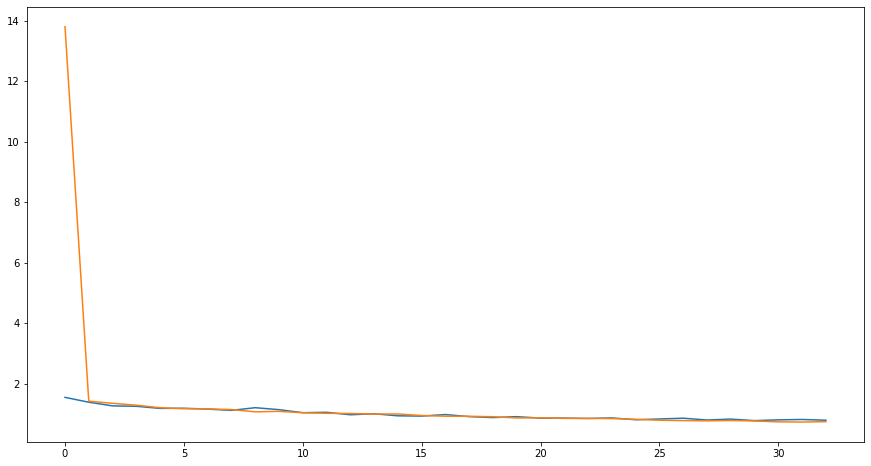

In [49]:
plt.figure(figsize=(15,8))
plt.plot(loss[['val_loss','loss']])

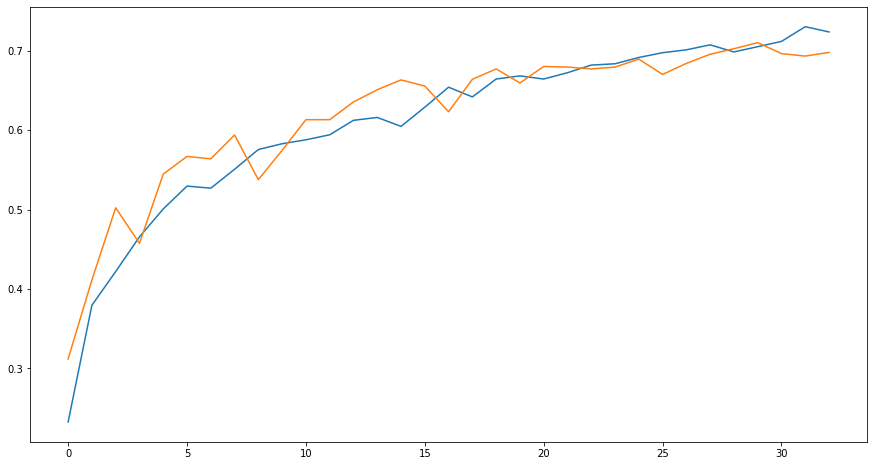

In [51]:
plt.figure(figsize=(15,8))
plt.plot(loss[['accuracy','val_accuracy']])

In [52]:
from tensorflow.keras.models import load_model

In [54]:
model.save('/content/drive/MyDrive/Colab Notebooks/ML/Flower reg','flower.h5')

In [4]:
from tensorflow.keras.models import load_model
model_last = load_model('flower.h5')

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/ML/Flower reg/flowers

/content/drive/MyDrive/Colab Notebooks/ML/Flower reg/flowers


In [5]:
import tensorflow as tf

In [46]:
def read_and_pre(path):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image,channels=3)
  image = tf.image.resize(image,([320,240]))
  image = image/255
  return np.array([image])

In [52]:
a = glob.glob('/content/drive/MyDrive/Colab Notebooks/ML/Flower reg/test/daisy/*.jpg')

In [53]:
for i in range(1,10):
  print(np.argmax(model_last.predict(read_and_pre(a[i])), axis=1))

1/1 [==============================] - 0s 16ms/step
[0]
1/1 [==============================] - 0s 17ms/step
[0]
1/1 [==============================] - 0s 32ms/step
[1]
1/1 [==============================] - 0s 18ms/step
[0]
1/1 [==============================] - 0s 17ms/step
[1]
1/1 [==============================] - 0s 25ms/step
[0]
1/1 [==============================] - 0s 17ms/step
[0]
1/1 [==============================] - 0s 17ms/step
[2]
1/1 [==============================] - 0s 18ms/step
[0]
